# Tasa de Mortalidad Infantil de Argentina
Tasa de Mortalidad Infantil de Argentina, en niños menores de un año de edad fallecidos por 1000 nacidos vivos, por jurisdicción de residencia de la madre ocurridos en el período desde 1990 a 2019.

## 1. Objetivo
Diseñar un sistema que permita detectar patrones entre infantes fallecidos en Argentina para identificar posibles prevenciones o curas. \
En esta ocación se va a estudiar las localidades de Argentina, Buenos Aires y Entre Ríos.

## 2. Contexto Comercial
Hay muchas causas y enfermedades por la que se puede generar el fallecimiento de un infante.

## 3. Problema Comercial
¿Existen patrones particulares de mortalidad infantil que puedan ser indicativos de prevención?

## 4. Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msgo
%matplotlib inline

In [2]:
data = pd.read_csv('datasets/tasa-mortalidad-infantil-1990-2020.csv')
data.head()

,indice_tiempo,mortalidad_infantil_argentina,mortalidad_infantil_caba,mortalidad_infantil_buenosaires,mortalidad_infantil_catamarca,mortalidad_infantil_cordoba,mortalidad_infantil_corrientes,mortalidad_infantil_chaco,mortalidad_infantil_chubut,mortalidad_infantil_entrerios,...,mortalidad_infantil_neuquen,mortalidad_infantil_rionegro,mortalidad_infantil_salta,mortalidad_infantil_sanjuan,mortalidad_infantil_sanluis,mortalidad_infantil_santacruz,mortalidad_infantil_santafe,mortalidad_infantil_santiagodelestero,mortalidad_infantil_tucuman,mortalidad_infantil_tierradelfuego
0,1990-01-01,25.6,16.8,24.2,34.6,22.2,31.7,35.8,20.6,24.3,...,16.9,23.1,32.3,24.4,29.7,20.7,28.3,28.3,28.5,27.9
1,1991-01-01,24.7,15.2,24.2,31.8,22.3,28.5,32.3,19.1,23.2,...,15.6,24.1,32.9,24.6,28.6,19.9,22.2,29.2,28.6,16.7
2,1992-01-01,23.9,14.9,23.5,28.1,19.6,27.7,33.5,19.9,22.1,...,16.2,22.7,32.8,23.7,23.7,20.6,20.9,28.7,28.8,11.2
3,1993-01-01,22.9,14.6,22.3,23.1,20.8,26.9,34.3,18.0,22.7,...,16.2,21.4,27.7,21.3,26.2,18.5,19.8,28.9,27.1,15.2
4,1994-01-01,22.0,14.3,21.8,29.8,20.0,26.1,31.4,18.4,20.4,...,15.3,19.6,29.8,21.3,27.6,15.9,17.8,29.0,23.9,13.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   indice_tiempo                          31 non-null     object 
 1   mortalidad_infantil_argentina          31 non-null     float64
 2   mortalidad_infantil_caba               31 non-null     float64
 3   mortalidad_infantil_buenosaires        31 non-null     float64
 4   mortalidad_infantil_catamarca          31 non-null     float64
 5   mortalidad_infantil_cordoba            31 non-null     float64
 6   mortalidad_infantil_corrientes         31 non-null     float64
 7   mortalidad_infantil_chaco              31 non-null     float64
 8   mortalidad_infantil_chubut             31 non-null     float64
 9   mortalidad_infantil_entrerios          31 non-null     float64
 10  mortalidad_infantil_formosa            31 non-null     float64
 11  mortalid

In [5]:
# Tansformar indice_tiempo a tipo datetime
data.indice_tiempo = pd.to_datetime(data.indice_tiempo)

In [6]:
data.shape

(31, 26)

In [7]:
data.describe()

,mortalidad_infantil_argentina,mortalidad_infantil_caba,mortalidad_infantil_buenosaires,mortalidad_infantil_catamarca,mortalidad_infantil_cordoba,mortalidad_infantil_corrientes,mortalidad_infantil_chaco,mortalidad_infantil_chubut,mortalidad_infantil_entrerios,mortalidad_infantil_formosa,...,mortalidad_infantil_neuquen,mortalidad_infantil_rionegro,mortalidad_infantil_salta,mortalidad_infantil_sanjuan,mortalidad_infantil_sanluis,mortalidad_infantil_santacruz,mortalidad_infantil_santafe,mortalidad_infantil_santiagodelestero,mortalidad_infantil_tucuman,mortalidad_infantil_tierradelfuego
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,15.277419,9.951613,15.000000,18.135484,13.674194,19.993548,21.641935,13.245161,14.958065,22.503226,...,10.851613,13.467742,18.335484,16.093548,16.122581,13.351613,13.493548,15.280645,18.687097,9.716129
std,5.264074,3.154137,5.039709,7.491486,4.699927,6.044939,8.922174,4.828653,4.956798,6.419475,...,3.537501,5.287431,7.079715,5.690983,6.472491,4.320715,4.756885,6.882171,6.501884,4.382929
min,8.400000,4.900000,8.200000,7.800000,7.100000,10.900000,9.400000,6.000000,8.100000,11.300000,...,5.200000,7.000000,10.000000,8.100000,8.000000,7.400000,8.200000,6.600000,10.400000,4.100000
25%,10.950000,7.850000,11.200000,11.350000,9.650000,15.100000,12.600000,9.350000,10.600000,16.850000,...,7.550000,9.050000,12.850000,10.850000,10.800000,9.700000,10.300000,11.200000,13.200000,7.250000
50%,13.300000,8.800000,13.000000,15.500000,12.700000,18.200000,21.200000,11.700000,13.500000,23.000000,...,10.300000,11.700000,15.400000,16.400000,15.700000,12.800000,12.000000,13.200000,16.200000,8.400000
75%,18.950000,12.600000,18.950000,23.200000,16.550000,24.950000,30.200000,18.000000,19.500000,27.400000,...,13.950000,16.400000,21.900000,21.300000,20.250000,16.600000,15.950000,16.850000,24.100000,11.000000
max,25.600000,16.800000,24.200000,34.600000,22.300000,31.700000,35.800000,20.600000,24.300000,33.200000,...,16.900000,24.100000,32.900000,25.200000,29.700000,21.900000,28.300000,29.200000,28.900000,27.900000


De la tabla anterior podemos concluir que la Mortalidad Infantil en:
* Argentina va entre 8.4 y 25.6, siendo la media de 13.3 niños menores de 1 año de edad por cada mil nacidos vivos.
* Buenos Aires va entre 8.2 y 24.2, siendo la media de 13 niños menores de 1 año de edad por cada mil nacidos vivos.
* Entre Ríos va entre 8.1 y 24.3, siendo la media de 11.7 niños menores de 1 año de edad por cada mil nacidos vivos.


## 5. Exploratory Data Analysis (EDA)

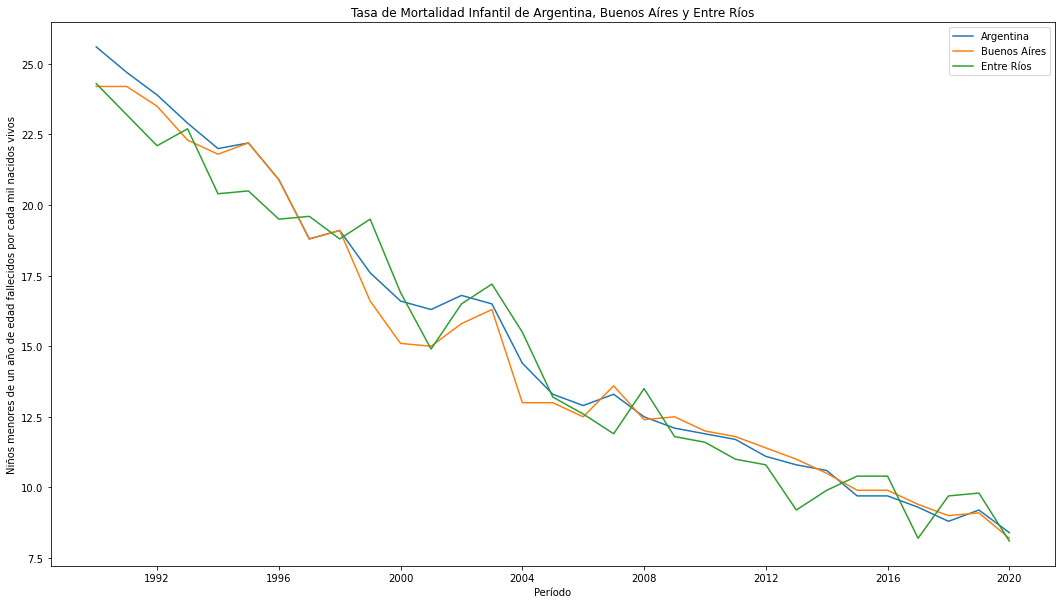

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(data.indice_tiempo, data.mortalidad_infantil_argentina, label='Argentina')
ax.plot(data.indice_tiempo, data.mortalidad_infantil_buenosaires, label='Buenos Aíres')
ax.plot(data.indice_tiempo, data.mortalidad_infantil_entrerios, label='Entre Ríos')

ax.set_xlabel('Período')
ax.set_ylabel('Niños menores de un año de edad fallecidos por cada mil nacidos vivos')
ax.set_title('Tasa de Mortalidad Infantil de Argentina, Buenos Aíres y Entre Ríos')
ax.legend()
plt.show()

## 6. Data Wrangling

### Valores nulos
No se registran valores nulos en esta dataset

In [17]:
data.isnull().sum()

indice_tiempo                            0
mortalidad_infantil_argentina            0
mortalidad_infantil_caba                 0
mortalidad_infantil_buenosaires          0
mortalidad_infantil_catamarca            0
mortalidad_infantil_cordoba              0
mortalidad_infantil_corrientes           0
mortalidad_infantil_chaco                0
mortalidad_infantil_chubut               0
mortalidad_infantil_entrerios            0
mortalidad_infantil_formosa              0
mortalidad_infantil_jujuy                0
mortalidad_infantil_lapampa              0
mortalidad_infantil_larioja              0
mortalidad_infantil_mendoza              0
mortalidad_infantil_misiones             0
mortalidad_infantil_neuquen              0
mortalidad_infantil_rionegro             0
mortalidad_infantil_salta                0
mortalidad_infantil_sanjuan              0
mortalidad_infantil_sanluis              0
mortalidad_infantil_santacruz            0
mortalidad_infantil_santafe              0
mortalidad_

### Valores duplicados
No se registran valores duplicados

In [18]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool

### Normalización de variables

In [22]:
def normalize(df):
    result = df.copy()

    for feature_name in df.columns[1:]:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
    
    return result

In [24]:
df = normalize(data)
df.head()

,indice_tiempo,mortalidad_infantil_argentina,mortalidad_infantil_caba,mortalidad_infantil_buenosaires,mortalidad_infantil_catamarca,mortalidad_infantil_cordoba,mortalidad_infantil_corrientes,mortalidad_infantil_chaco,mortalidad_infantil_chubut,mortalidad_infantil_entrerios,...,mortalidad_infantil_neuquen,mortalidad_infantil_rionegro,mortalidad_infantil_salta,mortalidad_infantil_sanjuan,mortalidad_infantil_sanluis,mortalidad_infantil_santacruz,mortalidad_infantil_santafe,mortalidad_infantil_santiagodelestero,mortalidad_infantil_tucuman,mortalidad_infantil_tierradelfuego
0,1990-01-01,1.000000,1.000000,1.00000,1.000000,0.993421,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.941520,0.973799,0.953216,1.000000,0.917241,1.000000,0.960177,0.978378,1.000000
1,1991-01-01,0.947674,0.865546,1.00000,0.895522,1.000000,0.846154,0.867424,0.897260,0.932099,...,0.888889,1.000000,1.000000,0.964912,0.949309,0.862069,0.696517,1.000000,0.983784,0.529412
2,1992-01-01,0.901163,0.840336,0.95625,0.757463,0.822368,0.807692,0.912879,0.952055,0.864198,...,0.940171,0.918129,0.995633,0.912281,0.723502,0.910345,0.631841,0.977876,0.994595,0.298319
3,1993-01-01,0.843023,0.815126,0.88125,0.570896,0.901316,0.769231,0.943182,0.821918,0.901235,...,0.940171,0.842105,0.772926,0.771930,0.838710,0.765517,0.577114,0.986726,0.902703,0.466387
4,1994-01-01,0.790698,0.789916,0.85000,0.820896,0.848684,0.730769,0.833333,0.849315,0.759259,...,0.863248,0.736842,0.864629,0.771930,0.903226,0.586207,0.477612,0.991150,0.729730,0.399160
